# Sentiment Analysis Overview

### Key Terms Defined

*   **Sentiment Analysis:** The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc., is positive, negative, or neutral.
*   **Natural Language Processing (NLP):** A field of computer science, artificial intelligence, and computational linguistics concerned with the interactions between computers and human (natural) languages.
*   **DataFrame:** A two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is the primary data structure used in the pandas library.
*   **Tokenization:** The process of breaking down a piece of text into smaller units called tokens, which are typically individual words or punctuation marks.
*   **Part-of-Speech (POS) Tagging:** The process of assigning a grammatical category (such as noun, verb, adjective, etc.) to each word in a sentence.
*   **Named Entity Chunking/Recognition (NER):** The process of identifying and classifying named entities in text, such as persons, organizations, locations, dates, etc.
*   **VADER (Valence Aware Dictionary and sEntiment Reasoner):** A lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
*   **Hugging Face Transformers:** A popular open-source library that provides thousands of pre-trained models to perform tasks on texts such as text classification, information extraction, question answering, summarization, translation, text generation, etc.
*   **Pipeline (Hugging Face):** A high-level API provided by the Hugging Face `transformers` library that simplifies the use of pre-trained models by handling tokenization, model inference, and post-processing steps automatically for various tasks.

In [ ]:
# Import necessary libraries for data analysis, visualization, and natural language processing (NLP).
import pandas as pd # Library for data manipulation and analysis (e.g., DataFrames).
import numpy as np # Library for numerical operations and array handling.
import matplotlib.pyplot as plt # Module for creating static, interactive, and animated visualizations.
import seaborn as sns # Library for creating aesthetically pleasing statistical graphics, built on Matplotlib.

# Set the plotting style to 'ggplot' for better aesthetics.
plt.style.use('ggplot')

# Import the Natural Language Toolkit (NLTK) library for working with human language data.
import nltk
# Download necessary NLTK data packages for various NLP tasks:
# 'punkt_tab': Tokenizer model for splitting text into sentences and words.
nltk.download('punkt_tab')
# 'averaged_perceptron_tagger_eng': English part-of-speech tagger model.
nltk.download('averaged_perceptron_tagger_eng')
# 'maxent_ne_chunker_tab': Maximum entropy named entity chunker model for named entity recognition.
nltk.download('maxent_ne_chunker_tab')
# 'words': A corpus of English words.
nltk.download('words')
# 'vader_lexicon': Lexicon for VADER sentiment analysis, specifically for social media text.
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

# Import the kagglehub library to download datasets from Kaggle.
import kagglehub

# Download the latest version of the "snap/amazon-fine-food-reviews" dataset.
# The path variable will store the local location of the downloaded dataset files.
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

# Print the path to the downloaded dataset files.
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-fine-food-reviews' dataset.
Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [ ]:
import pandas as pd
# Read the downloaded CSV file into a pandas DataFrame.
# The file path is constructed using the 'path' variable obtained from kagglehub.dataset_download().
df = pd.read_csv(f'{path}/Reviews.csv')
# Display the entire DataFrame. This might take a while for large datasets.
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
# This cell accesses and displays the text content of a specific review from the DataFrame.
# It selects the 'Text' column and then accesses the review at index 47.
df['Text'][47]

'The flavors are good.  However, I do not see any differce between this and Oaker Oats brand - they are both mushy.'

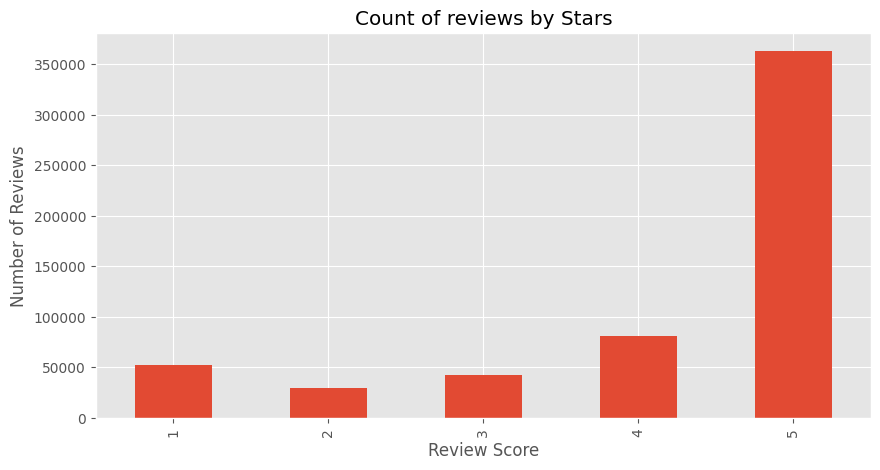

In [ ]:
# This cell generates a bar plot showing the count of reviews for each star rating.
# It uses the 'Score' column to count the occurrences of each rating and then plots the results.
df['Score'].value_counts().sort_index().plot(kind="bar",title="Count of reviews by Stars", figsize=(10,5))
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# This cell selects a specific review text from the DataFrame at index 50
# and assigns it to the variable 'example'. This text will be used for
# demonstrating NLP techniques in subsequent cells.
example = df['Text'][50]

In [ ]:
#tokenization
# This cell performs tokenization on the 'example' text using NLTK.
# Tokenization is the process of breaking down text into smaller units called tokens (words or punctuation).
tokens = nltk.word_tokenize(example)
tokens

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

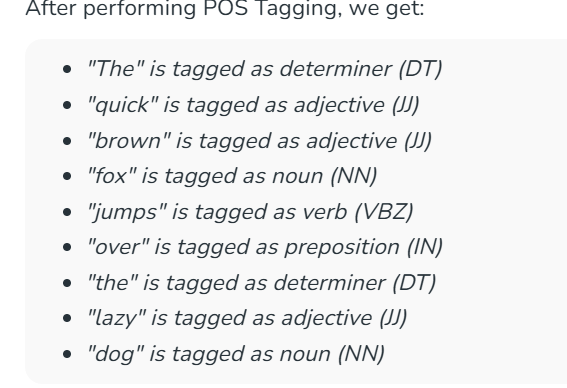

In [ ]:
#POS....part of speech
# This cell performs part-of-speech (POS) tagging on the tokens generated in the previous cell.
# POS tagging assigns a grammatical category (like noun, verb, adjective) to each word.
tagged =  nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [ ]:
# Named Entity Chunking
# This cell performs named entity chunking on the POS-tagged tokens.
# Named entity chunking identifies and classifies named entities (like persons, organizations, locations).
entities =  nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [ ]:
#VADER (BOW)
# This cell introduces the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool from NLTK.
# It also imports the tqdm library for displaying progress bars during processing.

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [ ]:
# This cell creates an instance of the SentimentIntensityAnalyzer from NLTK's sentiment module.
# This instance, named 'sia', will be used to calculate sentiment scores of text.
sia = SentimentIntensityAnalyzer()

In [ ]:
# This cell uses the VADER SentimentIntensityAnalyzer ('sia') to calculate the polarity scores for the given text.
# The polarity scores include negative ('neg'), neutral ('neu'), positive ('pos'), and a compound score.
sia.polarity_scores("Dewansh is not interested in studies")

{'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'compound': -0.3089}

In [ ]:
# This cell calculates the polarity scores for the 'example' text using the VADER SentimentIntensityAnalyzer ('sia').
# The 'example' variable holds a sample review text loaded earlier in the notebook.
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [ ]:
# This cell simply displays the content of the 'example' variable.
# The 'example' variable holds a sample review text that was selected for sentiment analysis demonstration.
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [ ]:
# This cell prints concise information about the DataFrame 'df'.
# It includes the index dtype and columns, non-null values and their types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
#run the polarity score on the entire dataset

# This cell iterates through each row of the DataFrame 'df' and calculates the VADER sentiment polarity scores for the 'Text' column.
# The results (negative, neutral, positive, and compound scores) are stored in a dictionary called 'res',
# where the keys are the 'Id' of the review and the values are the polarity score dictionaries.
# The tqdm progress bar is used to show the progress of this potentially long-running operation.
res = {}
for i ,row in tqdm(df.iterrows(),total=len(df)):
  text = row['Text']
  myid = row['Id']
  res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
# This cell converts the dictionary of sentiment results ('res') into a pandas DataFrame.
# The .T transposes the DataFrame so that the sentiment scores (neg, neu, pos, compound) become columns.
vaders = pd.DataFrame(res).T
# This line displays the resulting DataFrame containing the sentiment scores for each review ID.
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
568450,0.072,0.600,0.327,0.8589
568451,0.190,0.697,0.114,-0.4848
568452,0.037,0.884,0.078,0.4352
568453,0.041,0.506,0.452,0.9717


In [ ]:
# This cell resets the index of the 'vaders' DataFrame and renames the new index column to 'Id'.
# This is done to prepare the DataFrame for merging with the original DataFrame 'df' using the 'Id' column.
vaders = vaders.reset_index().rename(columns={"index":'Id'})

In [ ]:
# This cell merges the 'vaders' DataFrame (containing sentiment scores) with the original DataFrame 'df'.
# The merge is performed using a 'left' join on the 'Id' column, which adds the sentiment scores to the corresponding reviews in the original DataFrame.
vaders =  vaders.merge(df,how = 'left')

In [ ]:
# This cell displays the first few rows of the merged DataFrame 'vaders'.
# This allows you to see the original review data along with the calculated VADER sentiment scores (neg, neu, pos, compound).
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


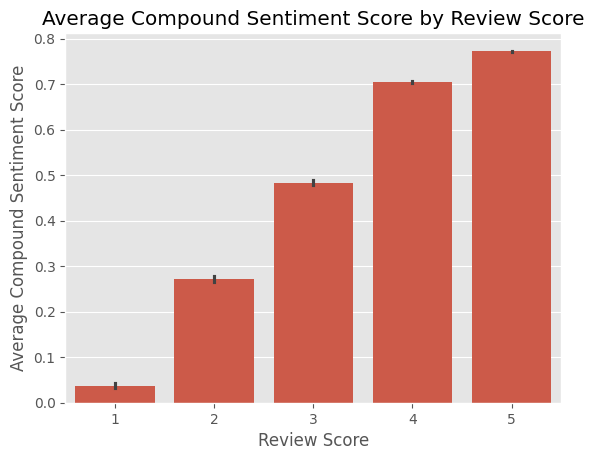

In [ ]:
# This cell generates a bar plot showing the average compound sentiment score for each review score.
# It uses the merged DataFrame 'vaders' and plots the 'compound' sentiment score against the 'Score'.
sns.barplot(data=vaders, x = "Score", y = "compound")
plt.title('Average Compound Sentiment Score by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Average Compound Sentiment Score')
plt.show()

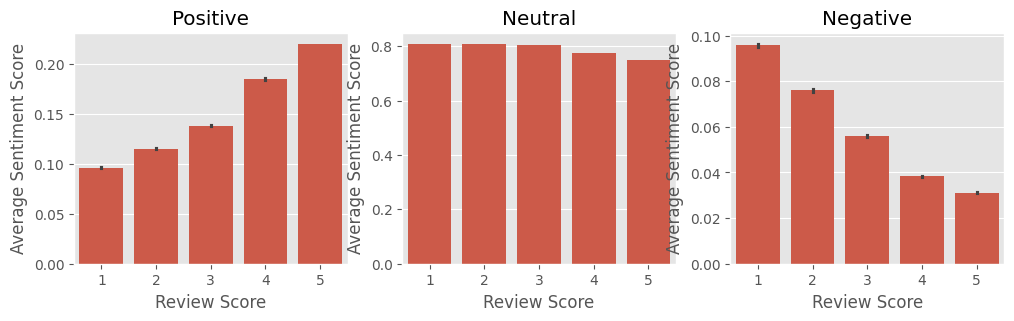

In [ ]:
# This cell generates three bar plots side-by-side to visualize the average positive, neutral, and negative sentiment scores for each review score.
fig , axs = plt.subplots(1,3,figsize = (12,3)) # Create a figure and a set of subplots with 1 row and 3 columns, and set the figure size.

sns.barplot(data=vaders, x = "Score", y = "pos" , ax = axs[0]) # Create a bar plot on the first subplot showing the average positive sentiment score for each Score.
sns.barplot(data=vaders, x = "Score", y = "neu",  ax = axs[1]) # Create a bar plot on the second subplot showing the average neutral sentiment score for each Score.
sns.barplot(data=vaders, x = "Score", y = "neg",  ax = axs[2]) # Create a bar plot on the third subplot showing the average negative sentiment score for each Score.


axs[0].set_title("Positive") # Set the title for the first subplot.
axs[0].set_xlabel("Review Score") # Set the x-axis label for the first subplot.
axs[0].set_ylabel("Average Sentiment Score") # Set the y-axis label for the first subplot.

axs[1].set_title("Neutral") # Set the title for the second subplot.
axs[1].set_xlabel("Review Score") # Set the x-axis label for the second subplot.
axs[1].set_ylabel("Average Sentiment Score") # Set the y-axis label for the second subplot.

axs[2].set_title("Negative") # Set the title for the third subplot.
axs[2].set_xlabel("Review Score") # Set the x-axis label for the third subplot.
axs[2].set_ylabel("Average Sentiment Score") # Set the y-axis label for the third subplot.

plt.show() # Display the generated figure with all three plots.

## Sentiment Analysis using Hugging Face Transformers

In [ ]:
from transformers import pipeline

# Create a sentiment analysis pipeline using a pre-trained model.
# This pipeline will automatically handle tokenization and model inference.
classifier = pipeline("sentiment-analysis")

# Define the text to be analyzed.
text = example
# Use the classifier pipeline to analyze the sentiment of the text.
result = classifier(text)

# Print the sentiment analysis result, which includes the predicted label (e.g., POSITIVE, NEGATIVE) and confidence score.
print(result)
# Output: [{'label': 'POSITIVE', 'score': 0.9998}]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'NEGATIVE', 'score': 0.9994776844978333}]


In [ ]:
from transformers import pipeline

# Create English-to-Hindi translator
# This uses a pre-trained model specifically for English to Hindi translation.
translator = pipeline("translation_en_to_hi",
                     model="Helsinki-NLP/opus-mt-en-hi")

# Define the text to be translated from English.
english_text = "Hello, how are you? I hope you are doing well today."
# Use the translator pipeline to translate the English text to Hindi.
hindi_translation = translator(english_text)

# Print the original English text and the translated Hindi text.
print("English:", english_text)
print("Hindi:", hindi_translation[0]['translation_text'])

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


English: Hello, how are you? I hope you are doing well today.
Hindi: हैलो, तुम कैसे हो? मुझे आशा है कि आप आज अच्छी तरह से कर रहे हैं।
